## 1.1. 가설 설정
- 나이가 어릴수록 생존률이 높다
- 여자의 생존률이 남자보다 높다
- 1등급이 3등급보다 생존률이 높다

## 1.2. 데이터 출처
Kaggle.com

## 1.3. 데이터 로드하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_names = [f.name for f in fm.fontManager.ttflist]
# font_list, font_names
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]


[]

In [4]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns = ['id', '생존여부', '객실등급', '이름', '성별', '나이', '형제배우자수', '부모자식수', '티켓번호', '요금', '수하물', '선착장']

In [6]:
df

,id,생존여부,객실등급,이름,성별,나이,형제배우자수,부모자식수,티켓번호,요금,수하물,선착장
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1.4. 데이터 살펴보기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      891 non-null    int64  
 1   생존여부    891 non-null    int64  
 2   객실등급    891 non-null    int64  
 3   이름      891 non-null    object 
 4   성별      891 non-null    object 
 5   나이      714 non-null    float64
 6   형제배우자수  891 non-null    int64  
 7   부모자식수   891 non-null    int64  
 8   티켓번호    891 non-null    object 
 9   요금      891 non-null    float64
 10  수하물     204 non-null    object 
 11  선착장     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,id,생존여부,객실등급,나이,형제배우자수,부모자식수,요금
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df['선착장']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: 선착장, Length: 891, dtype: object

In [10]:
df.drop(['id', '이름', '티켓번호', '수하물'], axis=True, inplace=True)
df.head()

,생존여부,객실등급,성별,나이,형제배우자수,부모자식수,요금,선착장
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 1.5. 데이터 분석

In [11]:
# 생존자수 보기
df.생존여부.value_counts()

0    549
1    342
Name: 생존여부, dtype: int64

/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: Runtim

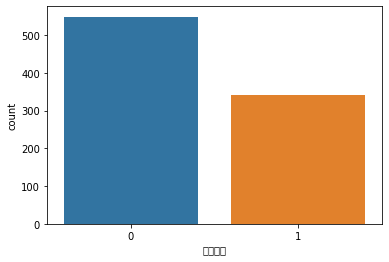

In [12]:
sns.countplot(x='생존여부', data=df)
plt.show()

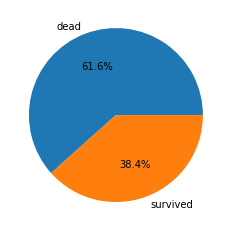

In [13]:
plt.pie(
    df.생존여부.value_counts(),
    labels=["dead", "survived"],
    autopct="%.1f%%"
)
plt.show()

### 1.5.1 나이별 분석

In [14]:
df.나이.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64

/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: Ru

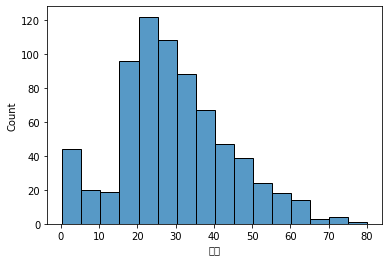

In [15]:
# 나이 분포도
sns.histplot(
    data=df.나이,
    bins=16
)
plt.show()

In [16]:
df.loc[df.나이 < 10, '생존여부'].count()

62

In [17]:
df.loc[df.나이 < 10, '생존여부'].mean()

0.6129032258064516

In [18]:
survival_rate = []
for i in range(10, 91, 10):
    survival_rate.append(df.loc[(df.나이 >= i - 10) & (df.나이 < i), '생존여부'].mean())
survival_rate

[0.6129032258064516,
 0.4019607843137255,
 0.35,
 0.437125748502994,
 0.38202247191011235,
 0.4166666666666667,
 0.3157894736842105,
 0.0,
 1.0]

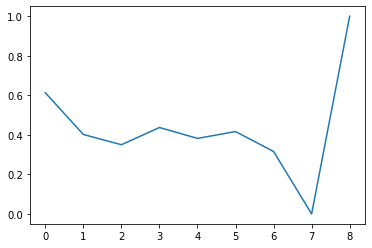

In [19]:
sns.lineplot(data=survival_rate)
plt.show()
# 나이가 어릴수록 생존율이 높다는 가설은 완벽히 일치한다고 볼 수 없다

### 1.5.2. 성별에 따른 데이터 분석

In [20]:
df.groupby('성별')['생존여부'].count().to_frame()

,생존여부
성별,
female,314
male,577


In [21]:
df.groupby('성별')['생존여부'].sum().to_frame()

,생존여부
성별,
female,233
male,109


/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 

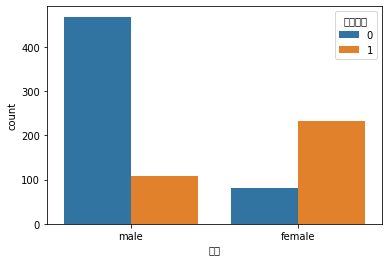

In [22]:
sns.countplot(x='성별', hue='생존여부', data=df)
plt.show()

In [23]:
# df.groupby('성별')['생존여부'].mean().to_frame()
sns.barplot(x='성별', data=df)

TypeError: Horizontal orientation requires numeric `x` variable.

### 1.5.3 객실 등급별 데이터 분석

In [36]:
survivalsByRate = df.groupby('객실등급').생존여부.count().to_frame()
survivalsByRate

,생존여부
객실등급,
1,216
2,184
3,491


/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: Runtim

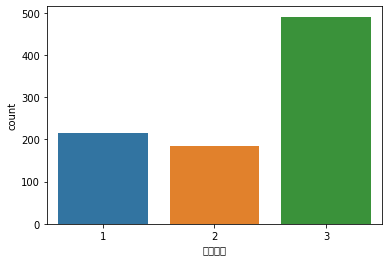

In [39]:
sns.countplot(x='객실등급', data=df)
plt.show()

/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWa

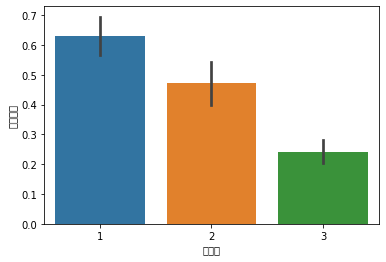

In [46]:
sns.barplot(x='객실등급', y='생존여부', data=df)
plt.xlabel('생존율')
plt.show()

/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 

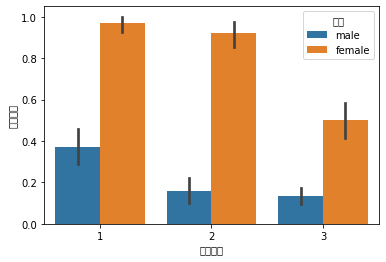

In [49]:
sns.barplot(x='객실등급', y='생존여부', hue="성별", data=df)
plt.show()

## 1.6. 상관관계 분석

In [1]:
corr = df.corr()
# df.성별 = df.성별 == 'female'

NameError: name 'df' is not defined

In [ ]:
sns.heatmap()